<a href="https://colab.research.google.com/github/meharkhanniazi/Farmdar-Projects/blob/main/PotatoDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
imageSize = 256
batchSize = 32
epochs = 8
channelSize = 3

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataSet = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PotatoDataset",
    batch_size = batchSize,
    image_size = (imageSize, imageSize),
    shuffle = True
)

Found 4491 files belonging to 5 classes.


In [ ]:
classNames = dataSet.class_names

In [ ]:
dataSet.file_paths

['/content/drive/MyDrive/PotatoDataset/Healthy/Healthy423.png',
 '/content/drive/MyDrive/PotatoDataset/Healthy/Healthy562.png',
 '/content/drive/MyDrive/PotatoDataset/Healthy/Healthy591.png',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/phytopthora711.JPG',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/potato11053.png',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus246.JPG',
 '/content/drive/MyDrive/PotatoDataset/Alternaria Solani/alternariasolani456.JPG',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus221.JPG',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/phytopthora988.JPG',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/phytopthora78.JPG',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus85.JPG',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/phytopthora444.JPG',
 '/content/drive/MyDrive/PotatoDataset/Insect/Insect198.png',
 '/content/drive/MyDrive/PotatoDataset/Alternaria Solani/alternariasolani906.J

In [ ]:
for imageBatch, labelBatch in dataSet.take(1):
  print(imageBatch.shape)
  print(labelBatch.numpy())

(32, 256, 256, 3)
[0 4 0 0 3 3 0 1 2 1 4 1 0 0 1 4 4 3 4 3 0 4 4 0 3 0 1 4 0 4 0 0]


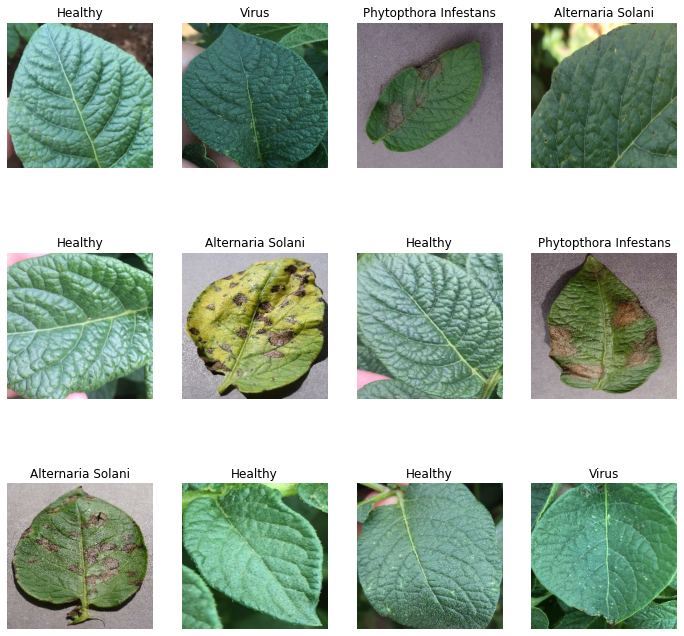

In [ ]:
plt.figure(figsize=(12, 12))
for imageBatch, labelBatch in dataSet.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(imageBatch[i].numpy().astype("uint8"))
    plt.title(classNames[labelBatch[i]])
    plt.axis('off'
  )

In [ ]:
trainingSize = 0.8
testSize = 0.1
validationSize = 0.1

In [ ]:
trainingDataSet = dataSet.take(int(len(dataSet) * trainingSize))

In [ ]:
trainingDataSet

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
len(trainingDataSet)

112

In [ ]:
testDataSet = dataSet.take(int(len(dataSet) * testSize))

In [ ]:
len(testDataSet)

14

In [ ]:
validationDataSet = dataSet.take(int(len(dataSet) - (len(trainingDataSet) + len(testDataSet))))

In [ ]:
len(validationDataSet)

15

In [ ]:
def getDataSetPartitions(ds, shuffle=True, shuffleSize=1000, trainingSize=trainingSize, testSize=testSize, validationSize=validationSize):
  if shuffle:
    ds = ds.shuffle(shuffleSize, seed=12)
    trainingDataSet = dataSet.take(int(len(dataSet) * trainingSize))
    testDataSet = dataSet.take(int(len(dataSet) * testSize))
    validationDataSet = dataSet.take(int(len(dataSet) - (len(trainingDataSet) + len(testDataSet))))
    return trainingDataSet, testDataSet, validationDataSet

In [ ]:
trainingDataSet, testDataSet, validationDataSet = getDataSetPartitions(dataSet)

In [ ]:
len(trainingDataSet)

112

In [ ]:
len(testDataSet)

14

In [ ]:
len(validationDataSet)

15

In [ ]:
trainingDataSet = trainingDataSet.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testDataSet = testDataSet.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validationDataSet = validationDataSet.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(imageSize, imageSize),
  layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
no_of_classes = len(classNames)
inputShape = (batchSize, imageSize, imageSize, channelSize)

In [ ]:
model = models.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=inputShape),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation="relu"),
  layers.Dense(no_of_classes, activation="softmax")
])

In [ ]:
model.build(input_shape=inputShape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
    trainingDataSet,
    epochs = epochs,
    batch_size = batchSize,
    verbose = 1,
    validation_data = validationDataSet
)

Epoch 1/8
112/112 [==============================] - 13s 120ms/step - loss: 0.2208 - accuracy: 0.9185 - val_loss: 0.2033 - val_accuracy: 0.9208
Epoch 2/8
112/112 [==============================] - 13s 119ms/step - loss: 0.2311 - accuracy: 0.9132 - val_loss: 0.1893 - val_accuracy: 0.9167
Epoch 3/8
112/112 [==============================] - 13s 119ms/step - loss: 0.2452 - accuracy: 0.9079 - val_loss: 0.2001 - val_accuracy: 0.9187
Epoch 4/8
112/112 [==============================] - 13s 120ms/step - loss: 0.2355 - accuracy: 0.9054 - val_loss: 0.1725 - val_accuracy: 0.9438
Epoch 5/8
112/112 [==============================] - 13s 119ms/step - loss: 0.2321 - accuracy: 0.9116 - val_loss: 0.2129 - val_accuracy: 0.9208
Epoch 6/8
112/112 [==============================] - 13s 119ms/step - loss: 0.2323 - accuracy: 0.9082 - val_loss: 0.2321 - val_accuracy: 0.9167
Epoch 7/8
112/112 [==============================] - 13s 119ms/step - loss: 0.2281 - accuracy: 0.9157 - val_loss: 0.2114 - val_accuracy:

In [ ]:
history.params

{'epochs': 8, 'steps': 112, 'verbose': 1}

In [ ]:
model.evaluate(testDataSet)

14/14 [==============================] - 8s 43ms/step - loss: 0.2725 - accuracy: 0.9152


[0.2724733352661133, 0.9151785969734192]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history["accuracy"]

[0.9185267686843872,
 0.9132254719734192,
 0.9079241156578064,
 0.9054129719734192,
 0.9115513563156128,
 0.908203125,
 0.9157366156578064,
 0.9140625]

First Image to predict: 
Actual Image: Phytopthora Infestans
Predicted Image: Phytopthora Infestans


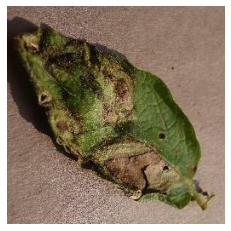

In [ ]:
import numpy as np
for imgBatch, lblBatch in testDataSet.take(1):
  firstImg = imgBatch[0].numpy().astype("uint8")
  firstLbl = lblBatch[0]

  print("First Image to predict: ")
  plt.imshow(firstImg)
  plt.axis("off")
  print(f"Actual Image: {classNames[firstLbl]}")
  batchPrediction = model.predict(imgBatch)
  print(f"Predicted Image: {classNames[np.argmax(batchPrediction[0])]}")

In [ ]:
model.save("/content/drive/MyDrive/Potato-Disease-Classification-Model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Potato-Disease-Classification-Model/assets
